In [1]:
# lab1.py
import numpy as np
import matplotlib.pyplot as plt

# ---------- параметры ----------
fs = 1000               # частота дискретизации, Гц
# Аналог
f_signal = 5            # Гц (для сигнала из задания 1)
t_a = np.arange(0, 1.0, 1/fs)  # 1 секунда

# Цифровой
bits = np.array([1,0,1,1,0,0,1])
bit_dur = 0.1
t_d = np.arange(0, len(bits)*bit_dur, 1/fs)


Задание 1 — генерация и визуализация

Создай временную сетку для аналогового сигнала: t_a = np.arange(0, 1.0, 1/fs).

Синусоидальный сигнал 5 Гц: s = np.sin(2*np.pi*5*t_a).

Последовательность бит: bits = np.array([1,0,1,1,0,0,1]).

Создай временную сетку для цифрового сигнала: t_d = np.arange(0, len(bits)*bit_dur, 1/fs).

Сформируй прямоугольные импульсы: для каждого бита заполнить соответствующий участок массива значением 1 или 0.

Построй два подграфика (subplot): верх — аналог, низ — цифровый.

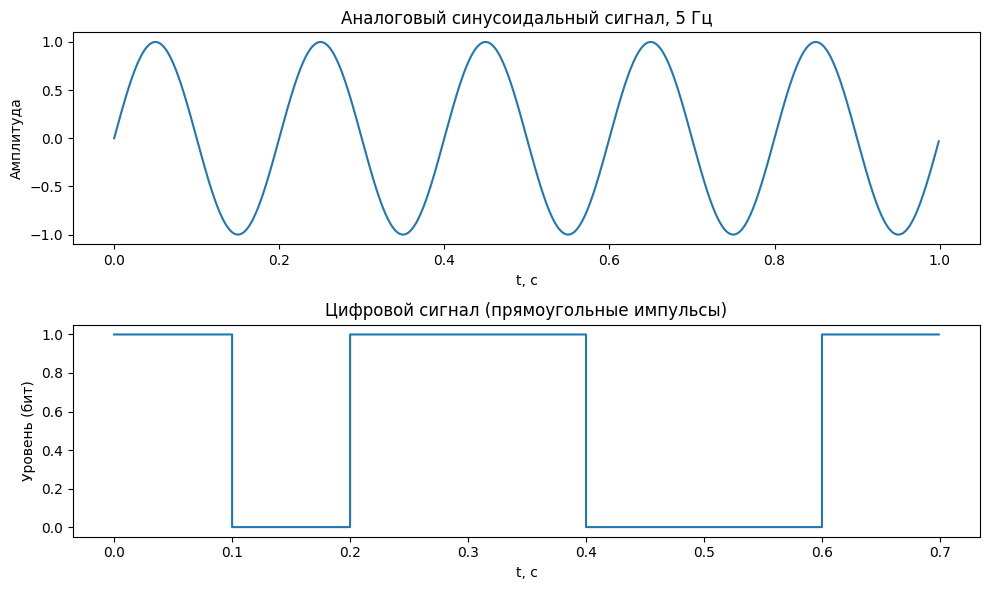

In [2]:
sig_analog = np.sin(2*np.pi*f_signal*t_a)

# формирование прямоугольных импульсов для битов
bit_signal = np.zeros_like(t_d)
samples_per_bit = int(bit_dur * fs)
for i, b in enumerate(bits):
    start = i * samples_per_bit
    end = start + samples_per_bit
    bit_signal[start:end] = b

# Plot: analog & digital
fig, axs = plt.subplots(2,1, figsize=(10,6), sharex=False)
axs[0].plot(t_a, sig_analog)
axs[0].set_title('Аналоговый синусоидальный сигнал, 5 Гц')
axs[0].set_xlabel('t, с')
axs[0].set_ylabel('Амплитуда')

axs[1].plot(t_d, bit_signal, drawstyle='steps-post')
axs[1].set_title('Цифровой сигнал (прямоугольные импульсы)')
axs[1].set_xlabel('t, с')
axs[1].set_ylabel('Уровень (бит)')
plt.tight_layout()
plt.savefig('task1_signals.png', dpi=200)
# plt.show()


Задание 2 — AM и FM

Несущая f_c = 50 Гц, модулирующий f_m = 5 Гц.

AM: s_AM = (1 + m*np.cos(2*np.pi*f_m*t_a)) * np.cos(2*np.pi*f_c*t_a) с m = 0.8.

FM: s_FM = np.cos(2*np.pi*f_c*t_a + beta * np.sin(2*np.pi*f_m*t_a)) с beta = 2.

Построй график несущей, модулятора и модулированных сигналов (несколько подграфиков).

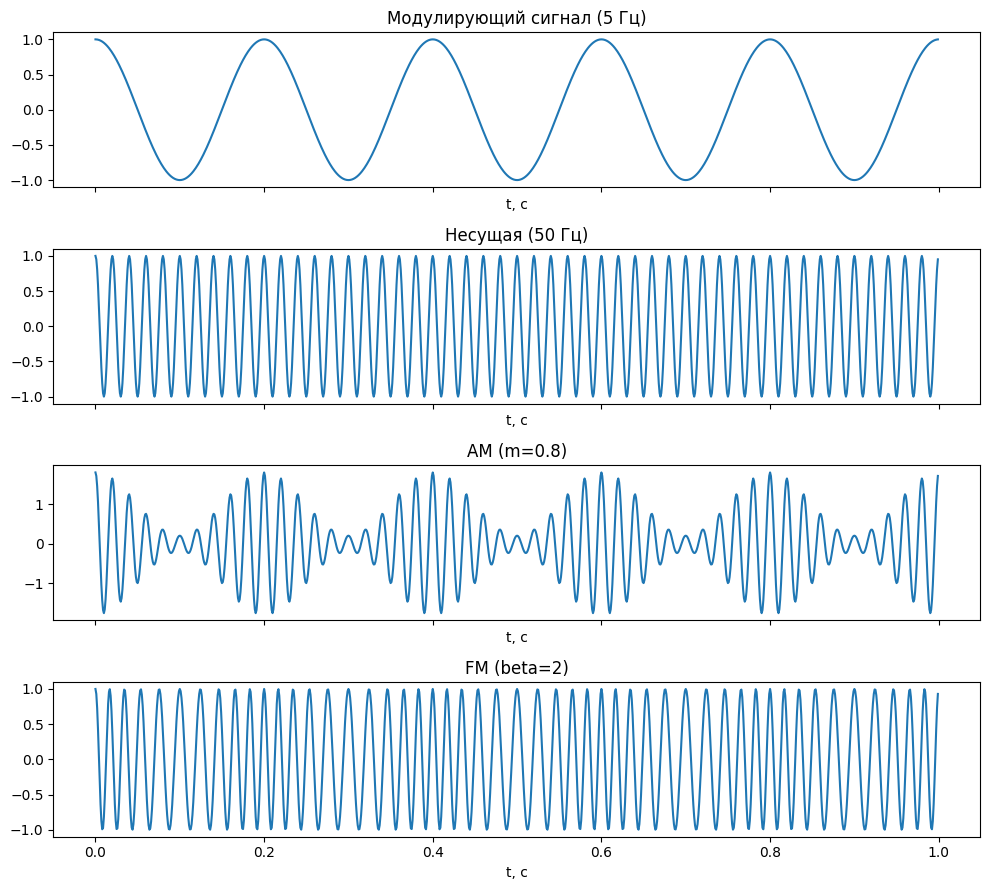

In [3]:
f_c = 50   # несущая, Гц
f_m = 5    # модулятор, Гц
m = 0.8
beta = 2.0

carrier = np.cos(2*np.pi*f_c*t_a)
modulator = np.cos(2*np.pi*f_m*t_a)
s_AM = (1 + m * modulator) * carrier
s_FM = np.cos(2*np.pi*f_c*t_a + beta * np.sin(2*np.pi*f_m*t_a))

fig2, axs2 = plt.subplots(4,1, figsize=(10,9), sharex=True)
axs2[0].plot(t_a, modulator); axs2[0].set_title('Модулирующий сигнал (5 Гц)')
axs2[1].plot(t_a, carrier); axs2[1].set_title('Несущая (50 Гц)')
axs2[2].plot(t_a, s_AM); axs2[2].set_title('AM (m=0.8)')
axs2[3].plot(t_a, s_FM); axs2[3].set_title('FM (beta=2)')
for ax in axs2: ax.set_xlabel('t, с')
plt.tight_layout()
plt.savefig('task2_AM_FM.png', dpi=200)
# plt.show()

Задание 3 — цифровые модуляции (ASK, FSK, PSK)

Используй t_d и bits.

ASK: амплитуда 1 для "1" и 0 для "0": s_ask = bit_signal * np.cos(2*np.pi*f_ask*t_d) (где f_ask — несущая, например 40 Гц).

FSK: частота 30 Гц для "1", 10 Гц для "0". Для каждого бита генерируем cos с соответствующей частотой на своем отрезке.

PSK: фаза 0 для "1" и π для "0": s_psk = np.cos(2*np.pi*f_psk*t_d + phase_array).

Построй графики трех сигналов (по отдельности или в одном окне с подграфиками).

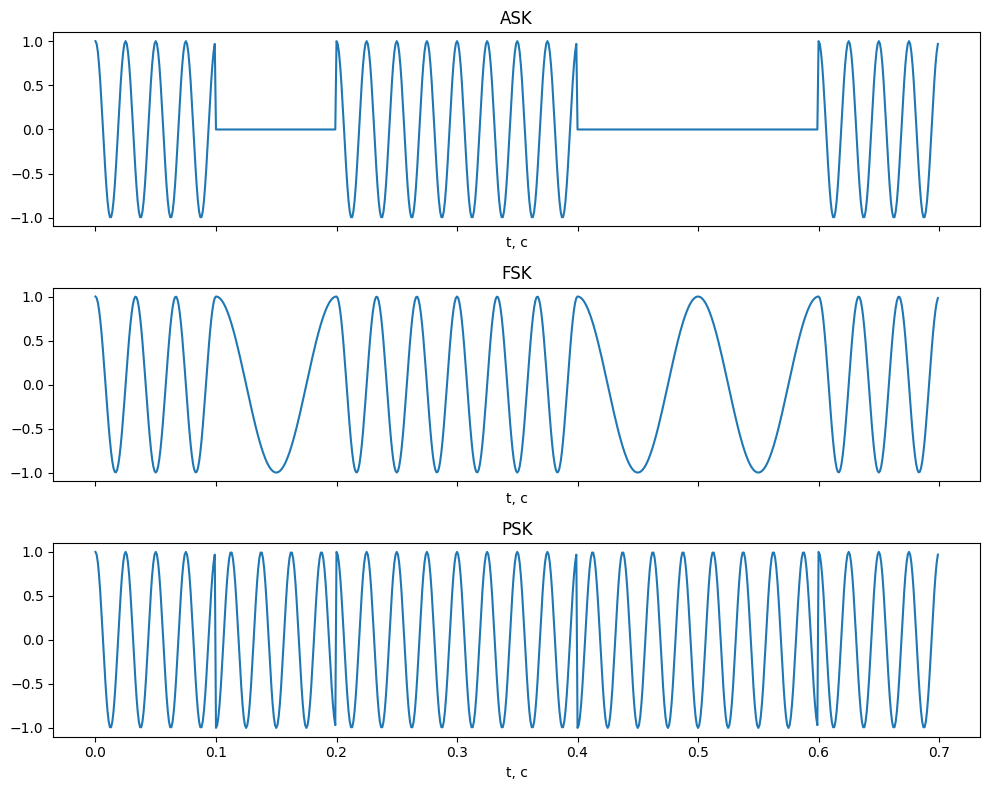

In [4]:
# параметры
f_ask = 40
f_fsk_1 = 30
f_fsk_0 = 10
f_psk = 40

# ASK
s_ask = bit_signal * np.cos(2*np.pi*f_ask*t_d)

# FSK
s_fsk = np.zeros_like(t_d)
for i, b in enumerate(bits):
    start = i * samples_per_bit
    end = start + samples_per_bit
    freq = f_fsk_1 if b == 1 else f_fsk_0
    s_fsk[start:end] = np.cos(2*np.pi*freq * t_d[start:end])

# PSK (phase 0 for 1, pi for 0)
phase = np.where(bit_signal == 1, 0.0, np.pi)
s_psk = np.cos(2*np.pi*f_psk*t_d + phase)

fig3, axs3 = plt.subplots(3,1, figsize=(10,8), sharex=True)
axs3[0].plot(t_d, s_ask); axs3[0].set_title('ASK')
axs3[1].plot(t_d, s_fsk); axs3[1].set_title('FSK')
axs3[2].plot(t_d, s_psk); axs3[2].set_title('PSK')
for ax in axs3: ax.set_xlabel('t, с')
plt.tight_layout()
plt.savefig('task3_digital_modulations.png', dpi=200)
# plt.show()


Задание 4 — устойчивость к шуму

Добавляем AWGN (аддитивный белый гауссов шум) с заданным SNR в dB (в документе SNR=10 дБ).

Правильная формула для генерации шума:

signal_power = np.mean(signal**2)

snr_lin = 10**(snr_db/10)

noise_power = signal_power / snr_lin

noise = np.random.normal(0, np.sqrt(noise_power), size=signal.shape)

noisy_signal = signal + noise


(в документе был опечатка — поправил).
3. Добавь шум ко всем модулированным сигналам и сравни визуально (оригинал vs зашумлённый).

Готово. Сгенерированы файлы: task1_signals.png, task2_AM_FM.png, task3_digital_modulations.png, task4_noise_comparison.png


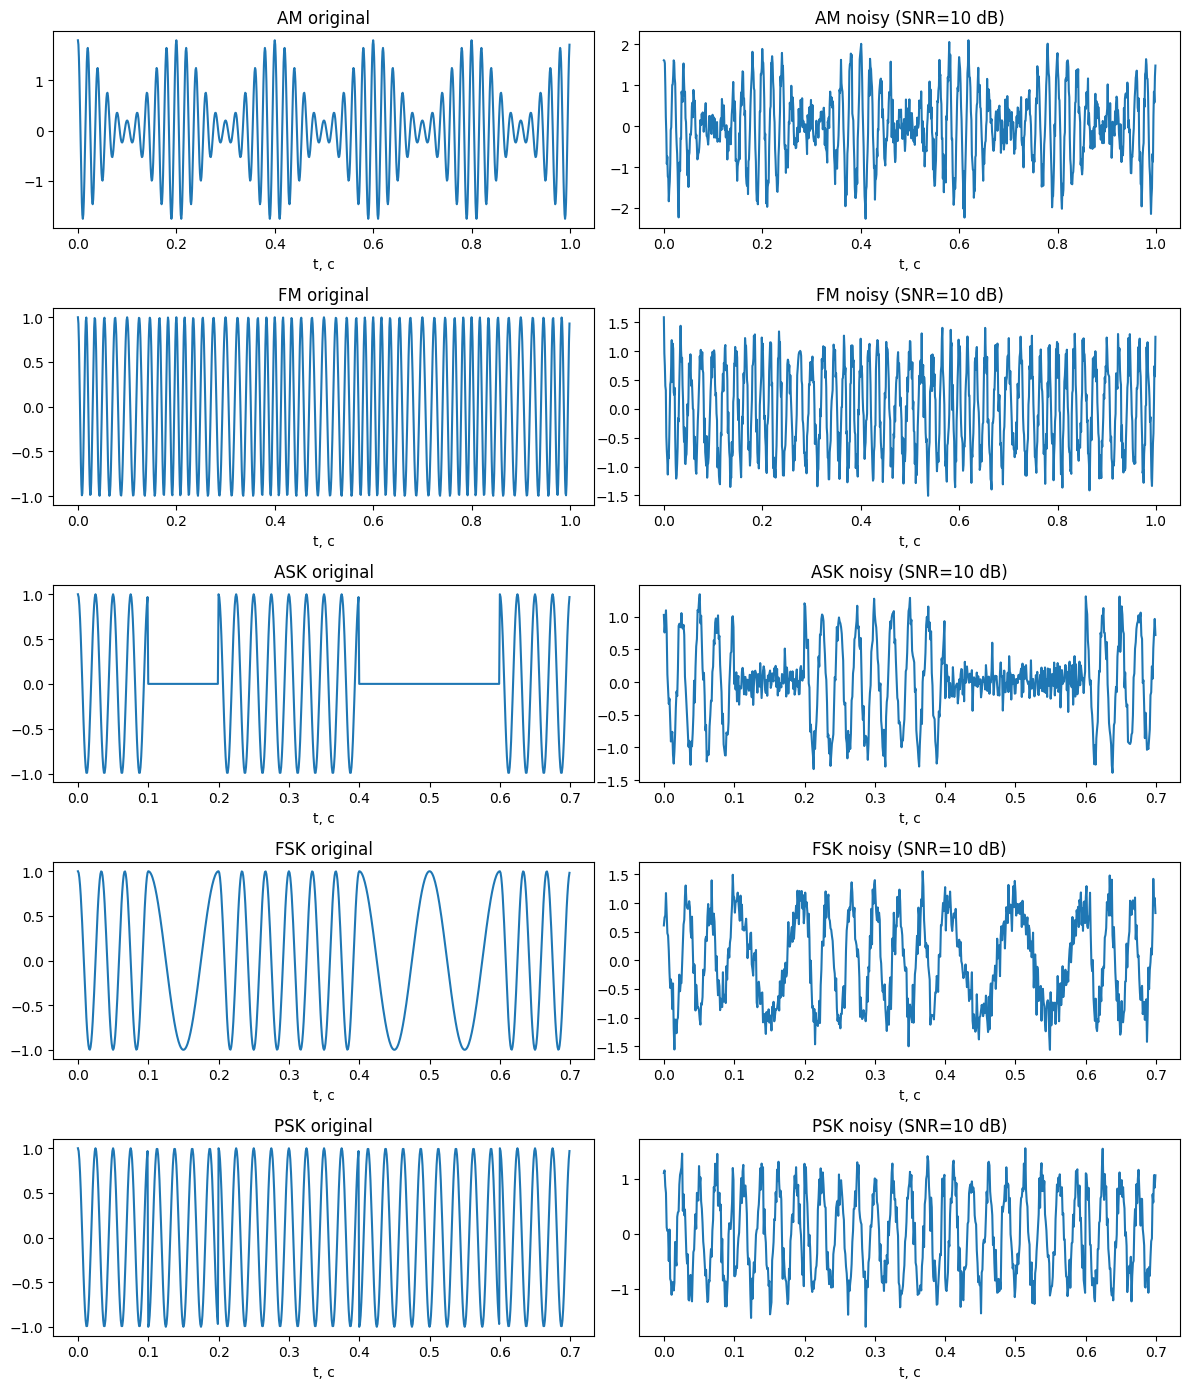

In [5]:
def add_awgn(signal, snr_db):
    signal_power = np.mean(signal**2)
    snr_lin = 10**(snr_db/10)
    noise_power = signal_power / snr_lin
    noise = np.random.normal(0, np.sqrt(noise_power), size=signal.shape)
    return signal + noise

snr_db = 10  # задано в условии
s_AM_n = add_awgn(s_AM, snr_db)
s_FM_n = add_awgn(s_FM, snr_db)
s_ask_n = add_awgn(s_ask, snr_db)
s_fsk_n = add_awgn(s_fsk, snr_db)
s_psk_n = add_awgn(s_psk, snr_db)

# Сравнение AM оригинал/за шум
fig4, axs4 = plt.subplots(5,2, figsize=(12,14))
axs4[0,0].plot(t_a, s_AM); axs4[0,0].set_title('AM original')
axs4[0,1].plot(t_a, s_AM_n); axs4[0,1].set_title(f'AM noisy (SNR={snr_db} dB)')

axs4[1,0].plot(t_a, s_FM); axs4[1,0].set_title('FM original')
axs4[1,1].plot(t_a, s_FM_n); axs4[1,1].set_title(f'FM noisy (SNR={snr_db} dB)')

axs4[2,0].plot(t_d, s_ask); axs4[2,0].set_title('ASK original')
axs4[2,1].plot(t_d, s_ask_n); axs4[2,1].set_title(f'ASK noisy (SNR={snr_db} dB)')

axs4[3,0].plot(t_d, s_fsk); axs4[3,0].set_title('FSK original')
axs4[3,1].plot(t_d, s_fsk_n); axs4[3,1].set_title(f'FSK noisy (SNR={snr_db} dB)')

axs4[4,0].plot(t_d, s_psk); axs4[4,0].set_title('PSK original')
axs4[4,1].plot(t_d, s_psk_n); axs4[4,1].set_title(f'PSK noisy (SNR={snr_db} dB)')

for ax_row in axs4:
    for ax in ax_row:
        ax.set_xlabel('t, с')
plt.tight_layout()
plt.savefig('task4_noise_comparison.png', dpi=200)
# plt.show()

print("Готово. Сгенерированы файлы: task1_signals.png, task2_AM_FM.png, task3_digital_modulations.png, task4_noise_comparison.png")